In [1]:
import unittest
import import_ipynb
import pandas as pd
import pandas.testing as pd_testing
import tensorflow as tf

class TestExercise03_01(unittest.TestCase):
    def setUp(self):
        import Exercise03_01
        self.exercises = Exercise03_01

        self.dataset_path = tf.keras.utils.get_file("auto-mpg.data",
                                             "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

        self.dataset = pd.read_csv(self.dataset_path, names=['MPG','Cylinders','Displacement','Horsepower','Weight',
                             'Acceleration', 'Model Year', 'Origin'], na_values = "?", comment='\t',
                                       sep=" ", skipinitialspace=True)

        self.dataset = self.dataset.dropna()
        self.dataset['Origin'] = self.dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
        self.dataset = pd.get_dummies(self.dataset, prefix='', prefix_sep='')
        
        self.train_dataset = self.dataset.sample(frac=0.8,random_state=0)
        self.test_dataset = self.dataset.drop(self.train_dataset.index)
        
        self.train_stats = self.train_dataset.describe()
        self.train_stats.pop("MPG")
        self.train_stats = self.train_stats.transpose()
        
        self.train_labels = self.train_dataset.pop('MPG')
        self.test_labels = self.test_dataset.pop('MPG')

        self.normed_train_data = (self.train_dataset - self.train_stats['mean']) / self.train_stats['std']
        self.normed_test_data = (self.test_dataset - self.train_stats['mean']) / self.train_stats['std']

    def test_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.dataset, self.dataset)
        
    def test_train_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.train_dataset, self.train_dataset)
        
    def test_test_dataset_df(self):
        pd_testing.assert_frame_equal(self.exercises.test_dataset, self.test_dataset)
    
    def test_train_labels_df(self):
        pd_testing.assert_series_equal(self.exercises.train_labels, self.train_labels)
        
    def test_test_labels_df(self):
        pd_testing.assert_series_equal(self.exercises.test_labels, self.test_labels)
        
    def test_normed_train_data_df(self):
        pd_testing.assert_frame_equal(self.exercises.normed_train_data, self.normed_train_data)
        
    def test_normed_test_data_df(self):
        pd_testing.assert_frame_equal(self.exercises.normed_test_data, self.normed_test_data)
        
    def test_mae(self):
        self.assertEqual(self.exercises.mae < 2.5, True)



test_dataset_df (__main__.TestExercise03_01) ... 

importing Jupyter notebook from Exercise03_01.ipynb
TensorFlow version: 2.1.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 584.7827 - mae: 22.8606 - mse: 584.7827 - val_loss: 580.6484 - val_mae: 22.7247 - val_mse: 580.6483
Epoch 2/1000
251/251 - 0s - loss: 533.4760 - mae: 21.7565 - mse: 533.4760 - val_loss: 528.0136 - val_mae: 21.5852 - val_mse: 52

Epoch 59/1000
251/251 - 0s - loss: 6.8293 - mae: 1.8642 - mse: 6.8293 - val_loss: 8.0162 - val_mae: 2.1719 - val_mse: 8.0162
Epoch 60/1000
251/251 - 0s - loss: 6.8806 - mae: 1.8278 - mse: 6.8806 - val_loss: 7.8849 - val_mae: 2.1066 - val_mse: 7.8849
Epoch 61/1000
251/251 - 0s - loss: 6.6038 - mae: 1.8164 - mse: 6.6038 - val_loss: 8.1188 - val_mae: 2.1088 - val_mse: 8.1188
Epoch 62/1000
251/251 - 0s - loss: 6.5757 - mae: 1.8197 - mse: 6.5757 - val_loss: 7.9985 - val_mae: 2.0817 - val_mse: 7.9985
Epoch 63/1000
251/251 - 0s - loss: 6.6960 - mae: 1.8453 - mse: 6.6960 - val_loss: 8.3684 - val_mae: 2.2686 - val_mse: 8.3684
Epoch 64/1000
251/251 - 0s - loss: 6.9932 - mae: 1.8468 - mse: 6.9932 - val_loss: 8.1908 - val_mae: 2.1477 - val_mse: 8.1908
Epoch 65/1000
251/251 - 0s - loss: 6.6679 - mae: 1.8340 - mse: 6.6679 - val_loss: 7.9131 - val_mae: 2.1233 - val_mse: 7.9131
Epoch 66/1000
251/251 - 0s - loss: 6.4863 - mae: 1.7946 - mse: 6.4863 - val_loss: 7.9530 - val_mae: 2.1507 - val_mse: 7.9530


Epoch 125/1000
251/251 - 0s - loss: 5.5690 - mae: 1.6326 - mse: 5.5690 - val_loss: 7.9315 - val_mae: 2.0782 - val_mse: 7.9315
Epoch 126/1000
251/251 - 0s - loss: 5.7425 - mae: 1.6820 - mse: 5.7425 - val_loss: 7.9461 - val_mae: 2.2381 - val_mse: 7.9461
Epoch 127/1000
251/251 - 0s - loss: 5.7678 - mae: 1.6808 - mse: 5.7678 - val_loss: 7.8641 - val_mae: 2.1935 - val_mse: 7.8641
Epoch 128/1000
251/251 - 0s - loss: 5.7087 - mae: 1.6576 - mse: 5.7087 - val_loss: 8.0042 - val_mae: 2.1961 - val_mse: 8.0042
Epoch 129/1000
251/251 - 0s - loss: 5.7567 - mae: 1.6545 - mse: 5.7567 - val_loss: 7.7571 - val_mae: 2.1829 - val_mse: 7.7571
Epoch 130/1000
251/251 - 0s - loss: 5.8374 - mae: 1.6777 - mse: 5.8374 - val_loss: 7.7353 - val_mae: 2.1750 - val_mse: 7.7353
Epoch 131/1000
251/251 - 0s - loss: 5.7302 - mae: 1.6207 - mse: 5.7302 - val_loss: 7.7737 - val_mae: 2.1909 - val_mse: 7.7737
Epoch 132/1000
251/251 - 0s - loss: 5.8931 - mae: 1.6803 - mse: 5.8931 - val_loss: 7.7920 - val_mae: 2.1834 - val_mse:

251/251 - 0s - loss: 5.3148 - mae: 1.5601 - mse: 5.3148 - val_loss: 7.7961 - val_mae: 2.1969 - val_mse: 7.7961
Epoch 191/1000
251/251 - 0s - loss: 5.1347 - mae: 1.5758 - mse: 5.1347 - val_loss: 7.7006 - val_mae: 2.1814 - val_mse: 7.7006
Epoch 192/1000
251/251 - 0s - loss: 5.0923 - mae: 1.5247 - mse: 5.0923 - val_loss: 7.9169 - val_mae: 2.2313 - val_mse: 7.9169
Epoch 193/1000
251/251 - 0s - loss: 5.0737 - mae: 1.5153 - mse: 5.0737 - val_loss: 7.9482 - val_mae: 2.1262 - val_mse: 7.9482
Epoch 194/1000
251/251 - 0s - loss: 5.2451 - mae: 1.5874 - mse: 5.2451 - val_loss: 7.7246 - val_mae: 2.1098 - val_mse: 7.7246
Epoch 195/1000
251/251 - 0s - loss: 5.1806 - mae: 1.5910 - mse: 5.1806 - val_loss: 7.7860 - val_mae: 2.1204 - val_mse: 7.7860
Epoch 196/1000
251/251 - 0s - loss: 5.0291 - mae: 1.5232 - mse: 5.0291 - val_loss: 8.3850 - val_mae: 2.1364 - val_mse: 8.3850
Epoch 197/1000
251/251 - 0s - loss: 4.9896 - mae: 1.5247 - mse: 4.9896 - val_loss: 8.0097 - val_mae: 2.2652 - val_mse: 8.0097
Epoch 1

Epoch 256/1000
251/251 - 0s - loss: 4.9680 - mae: 1.5189 - mse: 4.9680 - val_loss: 7.7398 - val_mae: 2.1596 - val_mse: 7.7398
Epoch 257/1000
251/251 - 0s - loss: 4.8094 - mae: 1.4765 - mse: 4.8094 - val_loss: 7.7777 - val_mae: 2.1225 - val_mse: 7.7777
Epoch 258/1000
251/251 - 0s - loss: 4.7905 - mae: 1.4964 - mse: 4.7905 - val_loss: 7.8872 - val_mae: 2.2152 - val_mse: 7.8872
Epoch 259/1000
251/251 - 0s - loss: 4.7576 - mae: 1.4865 - mse: 4.7576 - val_loss: 7.8402 - val_mae: 2.1627 - val_mse: 7.8402
Epoch 260/1000
251/251 - 0s - loss: 4.6292 - mae: 1.4702 - mse: 4.6292 - val_loss: 7.5740 - val_mae: 2.1582 - val_mse: 7.5740
Epoch 261/1000
251/251 - 0s - loss: 4.5736 - mae: 1.4594 - mse: 4.5736 - val_loss: 8.0428 - val_mae: 2.2122 - val_mse: 8.0428
Epoch 262/1000
251/251 - 0s - loss: 4.8057 - mae: 1.4743 - mse: 4.8057 - val_loss: 7.6873 - val_mae: 2.1700 - val_mse: 7.6873
Epoch 263/1000
251/251 - 0s - loss: 4.6619 - mae: 1.4922 - mse: 4.6619 - val_loss: 8.0448 - val_mae: 2.2582 - val_mse:

251/251 - 0s - loss: 4.3813 - mae: 1.4345 - mse: 4.3813 - val_loss: 8.0819 - val_mae: 2.2548 - val_mse: 8.0819
Epoch 322/1000
251/251 - 0s - loss: 4.4213 - mae: 1.4127 - mse: 4.4213 - val_loss: 8.1418 - val_mae: 2.2630 - val_mse: 8.1418
Epoch 323/1000
251/251 - 0s - loss: 4.4450 - mae: 1.4489 - mse: 4.4450 - val_loss: 8.0364 - val_mae: 2.2391 - val_mse: 8.0364
Epoch 324/1000
251/251 - 0s - loss: 4.5295 - mae: 1.4713 - mse: 4.5295 - val_loss: 8.1273 - val_mae: 2.2594 - val_mse: 8.1273
Epoch 325/1000
251/251 - 0s - loss: 4.3141 - mae: 1.4060 - mse: 4.3141 - val_loss: 7.9503 - val_mae: 2.1819 - val_mse: 7.9503
Epoch 326/1000
251/251 - 0s - loss: 4.3230 - mae: 1.4475 - mse: 4.3230 - val_loss: 8.1348 - val_mae: 2.2065 - val_mse: 8.1348
Epoch 327/1000
251/251 - 0s - loss: 4.5303 - mae: 1.4508 - mse: 4.5303 - val_loss: 8.1441 - val_mae: 2.2386 - val_mse: 8.1441
Epoch 328/1000
251/251 - 0s - loss: 4.2516 - mae: 1.4284 - mse: 4.2516 - val_loss: 8.0835 - val_mae: 2.2556 - val_mse: 8.0835
Epoch 3

Epoch 387/1000
251/251 - 0s - loss: 4.1112 - mae: 1.3665 - mse: 4.1112 - val_loss: 8.6656 - val_mae: 2.3461 - val_mse: 8.6656
Epoch 388/1000
251/251 - 0s - loss: 3.9592 - mae: 1.3795 - mse: 3.9592 - val_loss: 8.3131 - val_mae: 2.2856 - val_mse: 8.3131
Epoch 389/1000
251/251 - 0s - loss: 4.1414 - mae: 1.3473 - mse: 4.1414 - val_loss: 8.3976 - val_mae: 2.2295 - val_mse: 8.3976
Epoch 390/1000
251/251 - 0s - loss: 3.8651 - mae: 1.3553 - mse: 3.8651 - val_loss: 8.4591 - val_mae: 2.3077 - val_mse: 8.4591
Epoch 391/1000
251/251 - 0s - loss: 4.2193 - mae: 1.3932 - mse: 4.2193 - val_loss: 8.0080 - val_mae: 2.2011 - val_mse: 8.0080
Epoch 392/1000
251/251 - 0s - loss: 4.0060 - mae: 1.3533 - mse: 4.0060 - val_loss: 8.1214 - val_mae: 2.2537 - val_mse: 8.1214
Epoch 393/1000
251/251 - 0s - loss: 3.9273 - mae: 1.3289 - mse: 3.9273 - val_loss: 8.3963 - val_mae: 2.2758 - val_mse: 8.3963
Epoch 394/1000
251/251 - 0s - loss: 4.1230 - mae: 1.3473 - mse: 4.1230 - val_loss: 8.4411 - val_mae: 2.2554 - val_mse:

251/251 - 0s - loss: 3.6785 - mae: 1.3203 - mse: 3.6785 - val_loss: 8.4669 - val_mae: 2.3028 - val_mse: 8.4669
Epoch 453/1000
251/251 - 0s - loss: 3.7613 - mae: 1.2655 - mse: 3.7613 - val_loss: 8.3020 - val_mae: 2.2494 - val_mse: 8.3020
Epoch 454/1000
251/251 - 0s - loss: 3.5731 - mae: 1.2878 - mse: 3.5731 - val_loss: 8.5332 - val_mae: 2.3143 - val_mse: 8.5331
Epoch 455/1000
251/251 - 0s - loss: 3.6291 - mae: 1.2608 - mse: 3.6291 - val_loss: 8.2741 - val_mae: 2.2247 - val_mse: 8.2741
Epoch 456/1000
251/251 - 0s - loss: 3.7605 - mae: 1.3215 - mse: 3.7605 - val_loss: 7.8889 - val_mae: 2.1978 - val_mse: 7.8889
Epoch 457/1000
251/251 - 0s - loss: 3.5372 - mae: 1.2682 - mse: 3.5372 - val_loss: 8.2904 - val_mae: 2.2896 - val_mse: 8.2904
Epoch 458/1000
251/251 - 0s - loss: 3.6567 - mae: 1.2818 - mse: 3.6567 - val_loss: 8.3372 - val_mae: 2.2726 - val_mse: 8.3372
Epoch 459/1000
251/251 - 0s - loss: 3.7591 - mae: 1.3168 - mse: 3.7591 - val_loss: 8.2690 - val_mae: 2.2517 - val_mse: 8.2690
Epoch 4

Epoch 518/1000
251/251 - 0s - loss: 3.4988 - mae: 1.2706 - mse: 3.4988 - val_loss: 8.1103 - val_mae: 2.2513 - val_mse: 8.1103
Epoch 519/1000
251/251 - 0s - loss: 3.4145 - mae: 1.2244 - mse: 3.4145 - val_loss: 8.0691 - val_mae: 2.2276 - val_mse: 8.0691
Epoch 520/1000
251/251 - 0s - loss: 3.4718 - mae: 1.2045 - mse: 3.4718 - val_loss: 8.1460 - val_mae: 2.2252 - val_mse: 8.1460
Epoch 521/1000
251/251 - 0s - loss: 3.4655 - mae: 1.2268 - mse: 3.4655 - val_loss: 8.5987 - val_mae: 2.2979 - val_mse: 8.5987
Epoch 522/1000
251/251 - 0s - loss: 3.3334 - mae: 1.2288 - mse: 3.3334 - val_loss: 8.0068 - val_mae: 2.2078 - val_mse: 8.0068
Epoch 523/1000
251/251 - 0s - loss: 3.4110 - mae: 1.2261 - mse: 3.4110 - val_loss: 7.9645 - val_mae: 2.2142 - val_mse: 7.9645
Epoch 524/1000
251/251 - 0s - loss: 3.3826 - mae: 1.2440 - mse: 3.3826 - val_loss: 8.0022 - val_mae: 2.2182 - val_mse: 8.0022
Epoch 525/1000
251/251 - 0s - loss: 3.4376 - mae: 1.2311 - mse: 3.4376 - val_loss: 8.2229 - val_mae: 2.2381 - val_mse:

251/251 - 0s - loss: 3.1556 - mae: 1.1813 - mse: 3.1556 - val_loss: 8.2808 - val_mae: 2.2525 - val_mse: 8.2808
Epoch 584/1000
251/251 - 0s - loss: 3.1017 - mae: 1.1431 - mse: 3.1017 - val_loss: 8.1914 - val_mae: 2.2389 - val_mse: 8.1914
Epoch 585/1000
251/251 - 0s - loss: 3.1927 - mae: 1.1756 - mse: 3.1927 - val_loss: 8.0907 - val_mae: 2.2377 - val_mse: 8.0907
Epoch 586/1000
251/251 - 0s - loss: 3.1627 - mae: 1.1919 - mse: 3.1627 - val_loss: 8.0600 - val_mae: 2.2400 - val_mse: 8.0600
Epoch 587/1000
251/251 - 0s - loss: 3.0851 - mae: 1.1646 - mse: 3.0851 - val_loss: 8.4914 - val_mae: 2.2871 - val_mse: 8.4914
Epoch 588/1000
251/251 - 0s - loss: 3.1187 - mae: 1.1692 - mse: 3.1187 - val_loss: 8.3469 - val_mae: 2.2545 - val_mse: 8.3469
Epoch 589/1000
251/251 - 0s - loss: 3.1170 - mae: 1.1896 - mse: 3.1170 - val_loss: 8.3812 - val_mae: 2.2712 - val_mse: 8.3812
Epoch 590/1000
251/251 - 0s - loss: 3.2175 - mae: 1.1884 - mse: 3.2175 - val_loss: 8.1806 - val_mae: 2.2481 - val_mse: 8.1806
Epoch 5

Epoch 649/1000
251/251 - 0s - loss: 2.9603 - mae: 1.1296 - mse: 2.9603 - val_loss: 8.2990 - val_mae: 2.2451 - val_mse: 8.2990
Epoch 650/1000
251/251 - 0s - loss: 2.7540 - mae: 1.0963 - mse: 2.7540 - val_loss: 9.0650 - val_mae: 2.3409 - val_mse: 9.0650
Epoch 651/1000
251/251 - 0s - loss: 3.3040 - mae: 1.2031 - mse: 3.3040 - val_loss: 8.1309 - val_mae: 2.2391 - val_mse: 8.1309
Epoch 652/1000
251/251 - 0s - loss: 2.8525 - mae: 1.0854 - mse: 2.8525 - val_loss: 8.3361 - val_mae: 2.2675 - val_mse: 8.3361
Epoch 653/1000
251/251 - 0s - loss: 2.9032 - mae: 1.1252 - mse: 2.9032 - val_loss: 7.9805 - val_mae: 2.2232 - val_mse: 7.9805
Epoch 654/1000
251/251 - 0s - loss: 2.9199 - mae: 1.1265 - mse: 2.9199 - val_loss: 8.4608 - val_mae: 2.2837 - val_mse: 8.4608
Epoch 655/1000
251/251 - 0s - loss: 2.8876 - mae: 1.1514 - mse: 2.8876 - val_loss: 8.0012 - val_mae: 2.2235 - val_mse: 8.0012
Epoch 656/1000
251/251 - 0s - loss: 2.8423 - mae: 1.0983 - mse: 2.8423 - val_loss: 8.4932 - val_mae: 2.2898 - val_mse:

251/251 - 0s - loss: 2.7485 - mae: 1.0443 - mse: 2.7485 - val_loss: 8.4976 - val_mae: 2.2751 - val_mse: 8.4976
Epoch 715/1000
251/251 - 0s - loss: 2.6878 - mae: 1.0617 - mse: 2.6878 - val_loss: 8.2637 - val_mae: 2.2405 - val_mse: 8.2637
Epoch 716/1000
251/251 - 0s - loss: 2.7452 - mae: 1.0621 - mse: 2.7452 - val_loss: 8.9241 - val_mae: 2.3338 - val_mse: 8.9241
Epoch 717/1000
251/251 - 0s - loss: 2.7208 - mae: 1.0606 - mse: 2.7208 - val_loss: 8.2407 - val_mae: 2.2440 - val_mse: 8.2407
Epoch 718/1000
251/251 - 0s - loss: 2.7238 - mae: 1.0685 - mse: 2.7238 - val_loss: 8.7506 - val_mae: 2.2894 - val_mse: 8.7506
Epoch 719/1000
251/251 - 0s - loss: 2.6061 - mae: 1.0251 - mse: 2.6061 - val_loss: 8.7624 - val_mae: 2.3183 - val_mse: 8.7624
Epoch 720/1000
251/251 - 0s - loss: 2.6684 - mae: 1.0192 - mse: 2.6684 - val_loss: 8.2840 - val_mae: 2.2342 - val_mse: 8.2840
Epoch 721/1000
251/251 - 0s - loss: 2.8307 - mae: 1.0994 - mse: 2.8307 - val_loss: 8.0534 - val_mae: 2.2198 - val_mse: 8.0534
Epoch 7

Epoch 780/1000
251/251 - 0s - loss: 2.6375 - mae: 1.0567 - mse: 2.6375 - val_loss: 9.1480 - val_mae: 2.3672 - val_mse: 9.1480
Epoch 781/1000
251/251 - 0s - loss: 2.4580 - mae: 1.0148 - mse: 2.4580 - val_loss: 8.2960 - val_mae: 2.2427 - val_mse: 8.2960
Epoch 782/1000
251/251 - 0s - loss: 2.5406 - mae: 1.0375 - mse: 2.5406 - val_loss: 8.7030 - val_mae: 2.3171 - val_mse: 8.7030
Epoch 783/1000
251/251 - 0s - loss: 2.4646 - mae: 1.0203 - mse: 2.4646 - val_loss: 8.8630 - val_mae: 2.3253 - val_mse: 8.8630
Epoch 784/1000
251/251 - 0s - loss: 2.6814 - mae: 1.0202 - mse: 2.6814 - val_loss: 8.7061 - val_mae: 2.3041 - val_mse: 8.7061
Epoch 785/1000
251/251 - 0s - loss: 2.5137 - mae: 1.0091 - mse: 2.5137 - val_loss: 8.8342 - val_mae: 2.3109 - val_mse: 8.8342
Epoch 786/1000
251/251 - 0s - loss: 2.5370 - mae: 0.9997 - mse: 2.5370 - val_loss: 8.9821 - val_mae: 2.3391 - val_mse: 8.9821
Epoch 787/1000
251/251 - 0s - loss: 2.5190 - mae: 1.0195 - mse: 2.5190 - val_loss: 8.7759 - val_mae: 2.3062 - val_mse:

251/251 - 0s - loss: 2.3369 - mae: 0.9435 - mse: 2.3369 - val_loss: 8.5650 - val_mae: 2.3000 - val_mse: 8.5650
Epoch 846/1000
251/251 - 0s - loss: 2.4088 - mae: 0.9917 - mse: 2.4088 - val_loss: 8.6938 - val_mae: 2.3077 - val_mse: 8.6938
Epoch 847/1000
251/251 - 0s - loss: 2.3104 - mae: 0.9673 - mse: 2.3104 - val_loss: 8.5059 - val_mae: 2.2963 - val_mse: 8.5059
Epoch 848/1000
251/251 - 0s - loss: 2.3486 - mae: 1.0233 - mse: 2.3486 - val_loss: 9.0927 - val_mae: 2.3427 - val_mse: 9.0927
Epoch 849/1000
251/251 - 0s - loss: 2.2033 - mae: 0.9093 - mse: 2.2033 - val_loss: 8.5681 - val_mae: 2.2990 - val_mse: 8.5681
Epoch 850/1000
251/251 - 0s - loss: 2.4546 - mae: 1.0303 - mse: 2.4546 - val_loss: 8.8778 - val_mae: 2.3345 - val_mse: 8.8778
Epoch 851/1000
251/251 - 0s - loss: 2.3303 - mae: 0.9609 - mse: 2.3303 - val_loss: 9.4573 - val_mae: 2.3752 - val_mse: 9.4573
Epoch 852/1000
251/251 - 0s - loss: 2.4052 - mae: 0.9725 - mse: 2.4052 - val_loss: 9.0271 - val_mae: 2.3510 - val_mse: 9.0271
Epoch 8

251/251 - 0s - loss: 2.0979 - mae: 0.9043 - mse: 2.0979 - val_loss: 8.7248 - val_mae: 2.3110 - val_mse: 8.7248
Epoch 911/1000
251/251 - 0s - loss: 2.1432 - mae: 0.9427 - mse: 2.1432 - val_loss: 9.0039 - val_mae: 2.3219 - val_mse: 9.0039
Epoch 912/1000
251/251 - 0s - loss: 2.3953 - mae: 0.9838 - mse: 2.3953 - val_loss: 9.4116 - val_mae: 2.3707 - val_mse: 9.4116
Epoch 913/1000
251/251 - 0s - loss: 2.2498 - mae: 0.9541 - mse: 2.2498 - val_loss: 8.9157 - val_mae: 2.3282 - val_mse: 8.9157
Epoch 914/1000
251/251 - 0s - loss: 2.0708 - mae: 0.8697 - mse: 2.0708 - val_loss: 8.6842 - val_mae: 2.3008 - val_mse: 8.6842
Epoch 915/1000
251/251 - 0s - loss: 2.1929 - mae: 0.9278 - mse: 2.1929 - val_loss: 8.6032 - val_mae: 2.2978 - val_mse: 8.6032
Epoch 916/1000
251/251 - 0s - loss: 2.1432 - mae: 0.9002 - mse: 2.1432 - val_loss: 9.0658 - val_mae: 2.3367 - val_mse: 9.0658
Epoch 917/1000
251/251 - 0s - loss: 2.4254 - mae: 0.9879 - mse: 2.4254 - val_loss: 8.9511 - val_mae: 2.3225 - val_mse: 8.9511
Epoch 9

251/251 - 0s - loss: 2.2209 - mae: 0.9361 - mse: 2.2209 - val_loss: 9.1848 - val_mae: 2.3513 - val_mse: 9.1848
Epoch 976/1000
251/251 - 0s - loss: 2.1197 - mae: 0.9343 - mse: 2.1197 - val_loss: 9.8059 - val_mae: 2.4623 - val_mse: 9.8059
Epoch 977/1000
251/251 - 0s - loss: 2.1146 - mae: 0.9427 - mse: 2.1146 - val_loss: 9.3939 - val_mae: 2.3924 - val_mse: 9.3939
Epoch 978/1000
251/251 - 0s - loss: 2.0736 - mae: 0.8764 - mse: 2.0736 - val_loss: 9.1206 - val_mae: 2.3565 - val_mse: 9.1206
Epoch 979/1000
251/251 - 0s - loss: 2.1389 - mae: 0.9027 - mse: 2.1389 - val_loss: 9.1491 - val_mae: 2.3552 - val_mse: 9.1491
Epoch 980/1000
251/251 - 0s - loss: 2.0389 - mae: 0.8910 - mse: 2.0389 - val_loss: 9.6348 - val_mae: 2.4313 - val_mse: 9.6348
Epoch 981/1000
251/251 - 0s - loss: 2.2269 - mae: 0.9500 - mse: 2.2269 - val_loss: 9.2891 - val_mae: 2.3910 - val_mse: 9.2891
Epoch 982/1000
251/251 - 0s - loss: 2.1359 - mae: 0.9197 - mse: 2.1359 - val_loss: 9.5160 - val_mae: 2.4249 - val_mse: 9.5160
Epoch 9

251/251 - 0s - loss: 7.6196 - mae: 1.9687 - mse: 7.6196 - val_loss: 7.7872 - val_mae: 2.1994 - val_mse: 7.7872
Epoch 40/1000
251/251 - 0s - loss: 7.5733 - mae: 1.9601 - mse: 7.5733 - val_loss: 7.8010 - val_mae: 2.2562 - val_mse: 7.8010
Epoch 41/1000
251/251 - 0s - loss: 7.6741 - mae: 1.9509 - mse: 7.6741 - val_loss: 7.8449 - val_mae: 2.2154 - val_mse: 7.8449
Epoch 42/1000
251/251 - 0s - loss: 7.4441 - mae: 1.9303 - mse: 7.4441 - val_loss: 7.5499 - val_mae: 2.1829 - val_mse: 7.5499
Epoch 43/1000
251/251 - 0s - loss: 7.3788 - mae: 1.9305 - mse: 7.3788 - val_loss: 7.6443 - val_mae: 2.1100 - val_mse: 7.6443
Epoch 44/1000
251/251 - 0s - loss: 7.5452 - mae: 1.9630 - mse: 7.5452 - val_loss: 7.5302 - val_mae: 2.1655 - val_mse: 7.5302
Epoch 45/1000
251/251 - 0s - loss: 7.2492 - mae: 1.9199 - mse: 7.2492 - val_loss: 7.6864 - val_mae: 2.0954 - val_mse: 7.6864
Epoch 46/1000
251/251 - 0s - loss: 7.2640 - mae: 1.9068 - mse: 7.2640 - val_loss: 7.7092 - val_mae: 2.1874 - val_mse: 7.7092
Epoch 47/1000


ok
test_mae (__main__.TestExercise03_01) ... ok
test_normed_test_data_df (__main__.TestExercise03_01) ... ok
test_normed_train_data_df (__main__.TestExercise03_01) ... ok
test_test_dataset_df (__main__.TestExercise03_01) ... ok
test_test_labels_df (__main__.TestExercise03_01) ... ok
test_train_dataset_df (__main__.TestExercise03_01) ... ok
test_train_labels_df (__main__.TestExercise03_01) ... ok

----------------------------------------------------------------------
Ran 8 tests in 20.084s

OK


<unittest.runner.TextTestResult run=8 errors=0 failures=0>

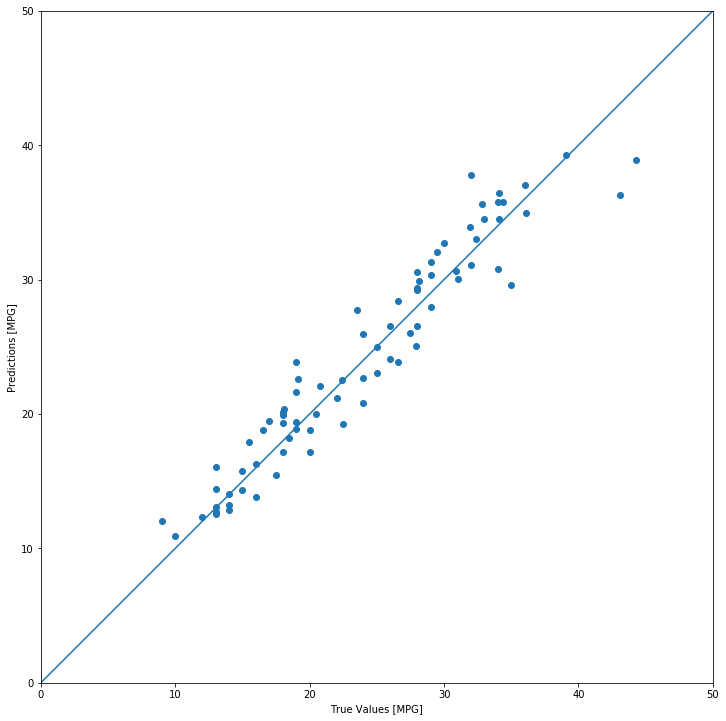

In [2]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestExercise03_01)
unittest.TextTestRunner(verbosity=2).run(suite)